## データ準備

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot

df = sns.load_dataset('tips')

df

df['tip_rate'] = df['tip']/df['total_bill']

df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布の描画

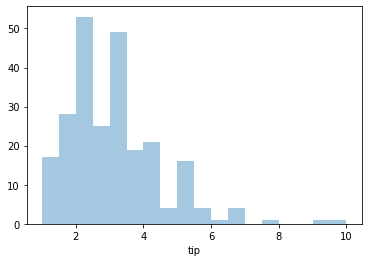

In [ ]:
#ヒストグラム
sns.distplot(df.tip, kde=False)

df.tip

In [ ]:
#ver確認
sns.__version__

'0.10.0'

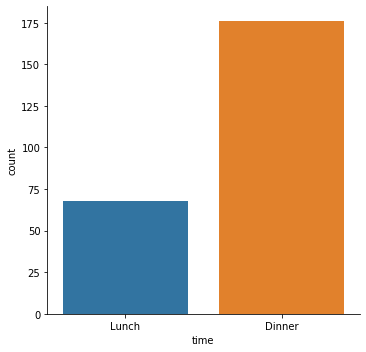

In [ ]:
#棒グラフ
sns.catplot(x='time', data= df, kind='count')

## 平均値


In [ ]:
np.mean([1,2,3,4])

2.5

In [ ]:
df 

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [ ]:
np.mean(df['tip_rate'])

0.16080258172250478

In [ ]:
x = np.linspace(0,10,1000)

In [ ]:
np.mean(x)

4.999999999999999

In [ ]:
df['tip_rate'].mean()

0.16080258172250478

In [ ]:
#カテゴリ別
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

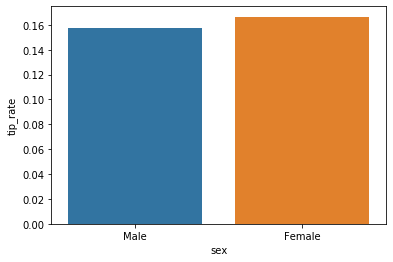

In [ ]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

## 中央値

In [ ]:
np.median(df['tip_rate'])

0.15476977125802577

In [ ]:
df['tip_rate'].median()

0.15476977125802577

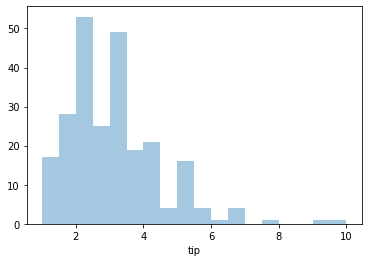

In [ ]:
sns.distplot(df.tip, kde=False)

In [ ]:
df['tip_rate'].median()

0.15476977125802577

In [ ]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2,0.153492
Female,16.40,2.75,2,0.155581


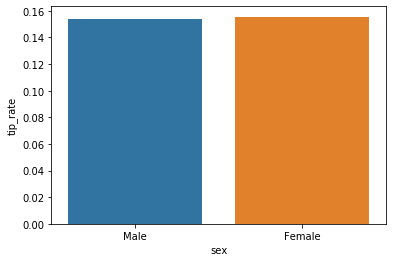

In [ ]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [ ]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値

In [ ]:
mode, count = stats.mode([1, 2, 2, 2, 3, 4])

In [ ]:
print(mode, count)

[2] [3]


In [ ]:
mode, count = stats.mode(df)

In [ ]:
# 各カラムごと
print(mode, count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]] [[  3  33 157 151  87 176 156   2]]


In [ ]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

In [ ]:
mode, count = stats.mode(df['size'])

In [ ]:
print(mode, count)

[2] [156]


## 範囲

In [ ]:
np.min(df['tip'])

1.0

In [ ]:
df['tip'].min()

1.0

In [ ]:
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [ ]:
np.max(df['tip'])

10.0

In [ ]:
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


## 四分位数

In [ ]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [ ]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [ ]:
#IQR
stats.iqr(df['tip_rate'])

0.06234812458689154

In [ ]:
#QD
stats.iqr(df['tip_rate'])/2

0.03117406229344577

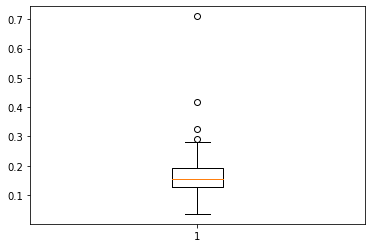

In [ ]:
#箱ひげ図
plt.boxplot(df['tip_rate'])
plt.show()

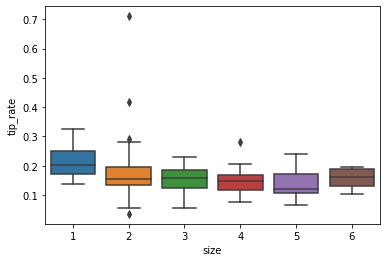

In [ ]:
#箱ひげ図
sns.boxplot(x='size', y='tip_rate', data=df)
plt.show()

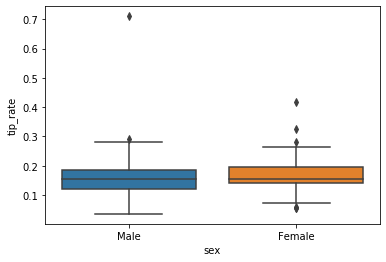

In [ ]:
sns.boxplot(x='sex', y='tip_rate', data=df)
plt.show()

## 分散と標準偏差

In [ ]:
np.var(df['tip'])

1.9066085124966428

In [ ]:
np.std(df['tip'])

1.3807999538298958

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [ ]:
tip_mean = df['tip'].mean()

In [ ]:
tip_mean

2.9982786885245902

## 共分散

In [ ]:
np.cov(df['total_bill'], df['tip'],bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [ ]:
#3つ以上の変数の共分散
x = np.stack([df['total_bill'], df['tip'], df['size']],axis=0)
np.cov(x,bias=True)

array([[78.92813149,  8.28938892,  5.04522121],
       [ 8.28938892,  1.90660851,  0.64126747],
       [ 5.04522121,  0.64126747,  0.9008835 ]])

## 相関係数 

In [ ]:
np.corrcoef(df['total_bill'],df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [ ]:
x = np.stack([df['total_bill'], df['tip'], df['size']],axis=0)
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [ ]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


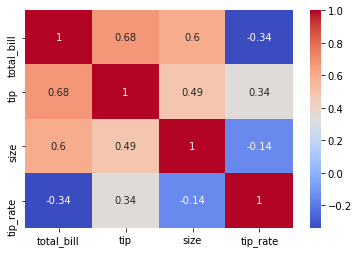

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

## 連関

In [ ]:
pd.crosstab(df.sex, df.time)

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [ ]:
cont_table = pd.crosstab(df.sex, df.time)
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## クラメールの連関係数

In [ ]:
def cramers_v(x, y):
    cont_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    min_d = min(cont_table.shape)-1
    n = len(x)
    v = np.sqrt(chi2/(min_d*n))
    return v

In [ ]:
cramers_v(df.sex, df.time)

0.20523129613344476

## 確率分布 

In [ ]:
# random variates(rvs): 確率変量
stats.randint.rvs(1,7)

3

In [ ]:
stats.uniform(1,7).rvs()

6.382922006271147

## 確率分布の描画

In [ ]:
def simple_func(x):
    return x**2 + 3


In [ ]:
simple_func(10)

23

In [ ]:
#連続型
x = np.linspace(-3,3,100)
y = simple_func(x)

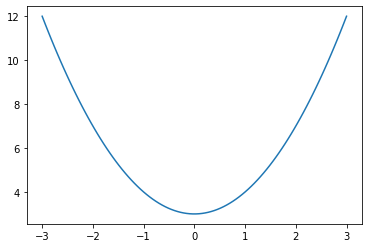

In [ ]:
plt.plot(x,y)

In [ ]:
##離散型
x = np.arange(-3,4)
y = simple_func(x)

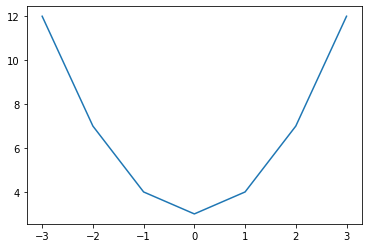

In [ ]:
plt.plot(x, y)

In [ ]:
#pmf 一様分布
x = np.arange(1, 7)
y = stats.randint(1, 7).pmf(x)
y

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [ ]:
#pdf
x = np.linspace(-1,1,10)
y = stats.uniform(0,1).pdf(x)
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [ ]:
1/6

0.16666666666666666

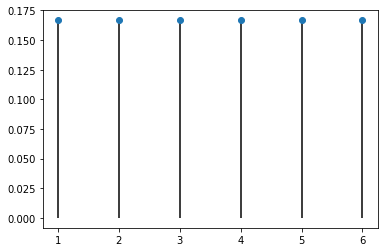

In [ ]:
#線⇒点
plt.plot(x, y, 'o')
#下から線を引く
plt.vlines(x, 0, y)

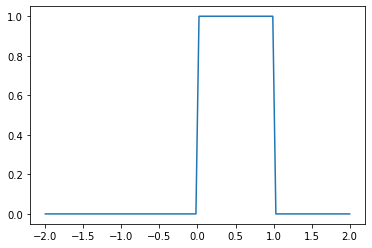

In [ ]:
x = np.linspace(-2,2,100)
y = stats.uniform(loc=0, scale=1).pdf(x)
plt.plot(x,y)

## CDF

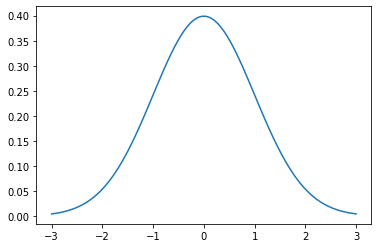

In [ ]:
x = np.linspace(-3,3,100)
y = stats.norm.pdf(x)
plt.plot(x,y)

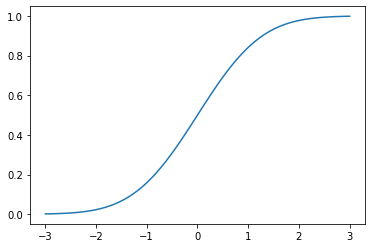

In [ ]:
y = stats.norm.cdf(x)
plt.plot(x, y)

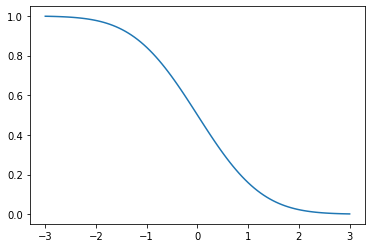

In [ ]:
#CDFの右側の確率密度
y = stats.norm.sf(x)
plt.plot(x, y)

## 正規分布

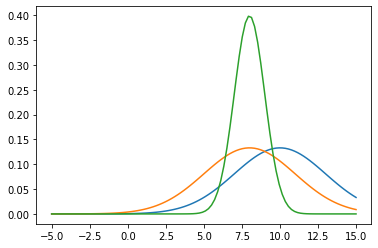

In [ ]:
x = np.linspace(-5, 15,100)
y = stats.norm(loc=10, scale=3).pdf(x)
y2 = stats.norm(loc=8, scale=3).pdf(x)
y3 = stats.norm(loc=8, scale=1).pdf(x)
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)

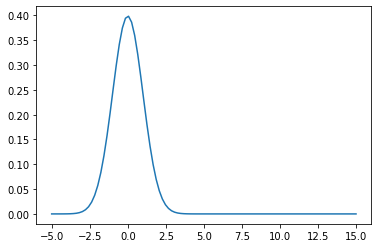

In [ ]:
#指定しないと平均0,分散1になる
y = stats.norm.pdf(x)
plt.plot(x, y)

## KDE

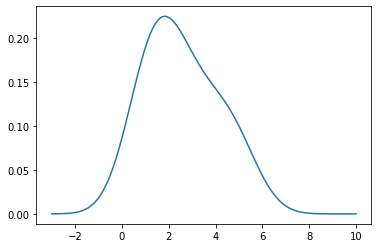

In [ ]:
x = np.linspace(-3, 10,100)
y = stats.gaussian_kde([1,1,2,2,3,4,5]).pdf(x)
plt.plot(x,y)

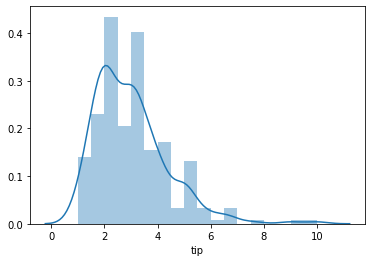

In [ ]:
sns.distplot(df['tip'], kde=True)

In [ ]:
resample_data = stats.gaussian_kde(df['tip']).resample()
resample_data

array([[ 1.78815057,  1.98009665,  4.02534907,  5.52665906,  2.02614715,
         6.14494264,  3.71590113,  2.85480538,  4.61777142, 10.29741474,
         1.25654711,  0.99303435,  4.02716511,  2.01172238,  2.25805761,
         2.20524102,  2.18298858,  3.40834191,  3.39772077,  2.84872089,
         4.16011705,  2.29040196,  6.91697479,  1.28262283,  4.44755209,
         3.25799189,  8.44943386,  2.15230386,  2.75460538,  1.29953503,
         2.7561361 ,  1.22444663,  3.80295291,  3.96274421,  3.41689833,
         1.80275625,  3.20942723,  1.98483079,  2.28584247,  2.02128362,
         2.02179196,  3.05967491,  1.17004701,  2.59923179,  2.54480634,
         2.03645533,  3.63104233, 10.32550516,  4.11394268,  2.89003688,
         3.14680663,  8.7355993 ,  2.00868969,  3.84471139,  3.06417754,
         8.28399772,  3.06373161,  6.15282217,  8.04692899,  7.7631818 ,
         2.80083858,  2.09130705,  3.05458434,  2.701111  ,  1.37108276,
         1.10301465,  5.08028325,  2.0891683 ,  5.0

## 66-95-99.7ルール

In [ ]:
samples = []
group1 = []
group2 = []
group3 = []
loc = 4
scale = 3
for i in range(1000):
  sample = stats.norm(loc=loc, scale=scale).rvs()
  if loc-scale < sample < loc+scale:
      group1.append(sample)
  elif loc-2*scale < sample < loc+2*scale:
      group2.append(sample)
  elif loc-3*scale < sample < loc+3*scale:
      group3.append(sample)

  samples.append(sample)

In [ ]:
len(group1)/len(samples)

0.662

In [ ]:
(len(group2)+len(group1))/len(samples)

0.955

In [ ]:
(len(group3)+len(group2)+len(group1))/len(samples)

0.998

## 標準化

In [ ]:
scaler = StandardScaler()
#2次元のでーたをいれる必要ある（二重リスト）
scaler.fit_transform([[1, 30], [2, 50], [3, 10], [4, 20]])

array([[-1.34164079,  0.16903085],
       [-0.4472136 ,  1.52127766],
       [ 0.4472136 , -1.18321596],
       [ 1.34164079, -0.50709255]])

In [ ]:
scaled = scaler.fit_transform(df.tip_rate.values.reshape(-1,1))

In [ ]:
#複数列の標準化
scaler.fit_transform(df[['total_bill','tip_rate']])

array([[-3.14711305e-01, -1.66301817e+00],
       [-1.06323531e+00, -4.28234299e-03],
       [ 1.37779900e-01,  9.49146717e-02],
       [ 4.38315103e-01, -3.44925940e-01],
       [ 5.40744704e-01, -2.29624968e-01],
       [ 6.19536705e-01,  4.17363756e-01],
       [-1.23995452e+00,  1.10337948e+00],
       [ 7.98507107e-01, -7.33936144e-01],
       [-5.34203307e-01, -5.00163567e-01],
       [-5.63468908e-01,  9.47315739e-01],
       [-1.07111451e+00,  9.35535257e-02],
       [ 1.74175992e+00, -3.11727577e-01],
       [-4.91430507e-01, -9.67838090e-01],
       [-1.52624903e-01,  3.24134057e-02],
       [-5.57840908e-01,  7.02885077e-01],
       [ 2.01939101e-01,  3.42053237e-01],
       [-1.06436091e+00,  1.41511894e-02],
       [-3.93503306e-01,  1.09840651e+00],
       [-3.16962505e-01,  7.45627991e-01],
       [ 9.72582994e-02,  2.33813456e-02],
       [-2.10030504e-01,  1.09728238e+00],
       [ 5.67366990e-02, -4.14587519e-01],
       [-4.52034507e-01, -3.18225155e-01],
       [ 2.

In [ ]:
scaled * 10 +50

array([[ 33.36981828],
       [ 49.95717657],
       [ 50.94914672],
       [ 46.5507406 ],
       [ 47.70375032],
       [ 54.17363756],
       [ 61.03379478],
       [ 42.66063856],
       [ 44.99836433],
       [ 59.47315739],
       [ 50.93553526],
       [ 46.88272423],
       [ 40.3216191 ],
       [ 50.32413406],
       [ 57.02885077],
       [ 53.42053237],
       [ 50.14151189],
       [ 60.98406513],
       [ 57.45627991],
       [ 50.23381346],
       [ 60.97282376],
       [ 45.85412481],
       [ 46.81774845],
       [ 55.16606793],
       [ 49.94116426],
       [ 45.17355156],
       [ 48.16004664],
       [ 49.47525348],
       [ 56.12895542],
       [ 48.665917  ],
       [ 48.52820785],
       [ 45.9698051 ],
       [ 56.30066304],
       [ 43.04511479],
       [ 53.79214012],
       [ 48.16616736],
       [ 43.73579175],
       [ 53.36888626],
       [ 43.8951679 ],
       [ 49.8515239 ],
       [ 46.52948726],
       [ 47.48515471],
       [ 59.63290777],
       [ 45

## 二項分布

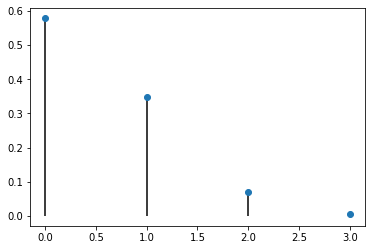

In [ ]:
n = 3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x,0,y)

## 二項分布->正規分布

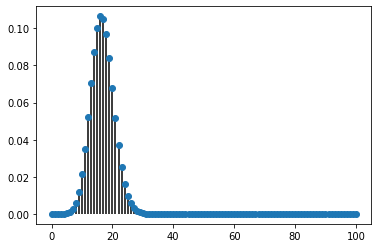

In [ ]:
#二項分布
n = 100
p = 1/6
x = np.arange(n+1)
y = stats.binom(n, p).pmf(x)
plt.plot(x, y, 'o')
plt.vlines(x, 0, y)

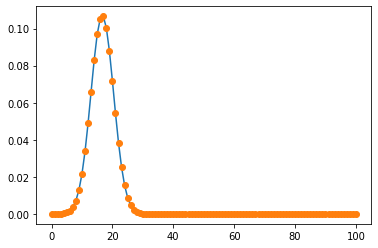

In [ ]:
#二項分布と正規分布で作成したグラフ比較
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x, y2)
plt.plot(x, y, 'o')

In [ ]:
# 平均
stats.binom(n, p).mean()

16.666666666666664

In [ ]:
n*p

16.666666666666664

In [ ]:
# 分散
stats.binom(n, p).var()

13.888888888888888

In [ ]:
n*p*(1-p)

13.888888888888888

## 標本分布

In [ ]:
m = 100
n = 50
column = 'tip'
sample_means = []
for a in range(m):
  sample_df = df.sample(n)
  sample_mean = sample_df[column].mean()
  sample_means.append(sample_mean)

In [ ]:
#平均
np.mean(sample_means)

3.0263899999999997

In [ ]:
df[column].mean()

2.9982786885245902

In [ ]:
# 分散 ※不変分散の方がよい
np.var(sample_means)

0.026107421995999993

In [ ]:
#母分散/n
np.var(df[column])/n

0.03813217024993285

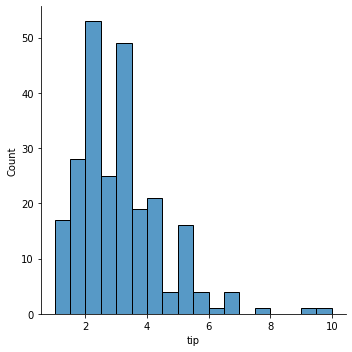

In [ ]:
#実際のデータは　右に外れ値あり
sns.displot(df[column])

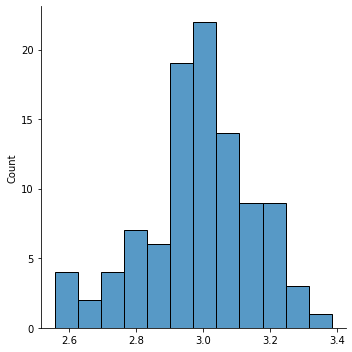

In [ ]:
sns.displot(sample_means)

## 不偏分散

In [ ]:
stats.tvar(df['tip'])

1.914454638062471

In [ ]:
np.var(df['tip'],ddof=1)

1.9144546380624725

In [ ]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [ ]:
stats.tstd(df['tip'])

1.3836381890011822

In [ ]:
np.std(df['tip'], ddof=1)

1.3836381890011826

## 不偏分散の不偏性

In [ ]:
a = 50
b = 10000
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(b):
    sample_df = df.sample(a)
    sample_var = np.var(sample_df[column])
    sample_uvar = stats.tvar(sample_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)



In [ ]:
#標本の不変分散の平均
np.mean(sample_uvars)

1.9130785677714288

In [ ]:
#母分散
np.var(df[column])

1.9066085124966428

In [ ]:
#標本の分散の平均
np.mean(sample_vars)

1.874816996416

# 比率の区間推定

In [ ]:
stats.binom.interval(0.95 ,1000 ,0.6)

(570.0, 630.0)

In [ ]:
n = 50
a = 0.95
m=100
population_male_ratio = len(df[df['sex']== 'Male']) / len(df)
results=[]

for _ in range(m):
    sample_df = df.sample(n)
    #フィルター使用して男のみ抽出
    male_ratio = len(sample_df[sample_df['sex']=='Male'])/len(sample_df)
    min_num, max_num = stats.binom.interval(a, n=n, p=male_ratio)
    min_ratio = min_num/n
    max_ratio = max_num/n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min': min_ratio, 'max': max_ratio, 'correct':correct})

In [ ]:
correct

True

In [ ]:
population_male_ratio

0.6434426229508197

In [ ]:
results[-20:]

[{'correct': True, 'max': 0.72, 'min': 0.44},
 {'correct': True, 'max': 0.74, 'min': 0.46},
 {'correct': True, 'max': 0.84, 'min': 0.6},
 {'correct': True, 'max': 0.78, 'min': 0.52},
 {'correct': True, 'max': 0.72, 'min': 0.44},
 {'correct': True, 'max': 0.86, 'min': 0.62},
 {'correct': True, 'max': 0.74, 'min': 0.46},
 {'correct': True, 'max': 0.72, 'min': 0.44},
 {'correct': True, 'max': 0.74, 'min': 0.46},
 {'correct': False, 'max': 0.62, 'min': 0.34},
 {'correct': True, 'max': 0.8, 'min': 0.54},
 {'correct': True, 'max': 0.72, 'min': 0.44},
 {'correct': True, 'max': 0.76, 'min': 0.48},
 {'correct': True, 'max': 0.8, 'min': 0.54},
 {'correct': True, 'max': 0.72, 'min': 0.44},
 {'correct': True, 'max': 0.78, 'min': 0.52},
 {'correct': True, 'max': 0.76, 'min': 0.48},
 {'correct': False, 'max': 0.9, 'min': 0.68},
 {'correct': True, 'max': 0.76, 'min': 0.48},
 {'correct': True, 'max': 0.74, 'min': 0.46}]

In [ ]:
max_ratio

0.74

In [ ]:
min_ratio

0.46

In [ ]:
#母集団比率
len(df[df['sex']== 'Male']) / len(df)

0.6434426229508197

In [ ]:
result_df = pd.DataFrame(results)
result_df
result_df['correct'].value_counts()

True     95
False     5
Name: correct, dtype: int64

## 平均の区間推定

In [ ]:
column = 'tip'
n = 50
i = 100
a = 0.95
alpha = 0.95
population_mean = df[column].mean()
results = []

for _ in range(100):

    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min':min_val, 'max':max_val, 'correct':correct})



In [ ]:
result_df = pd.DataFrame(results)

In [ ]:
result_df['correct'].value_counts()

True     98
False     2
Name: correct, dtype: int64

## ｔ分布

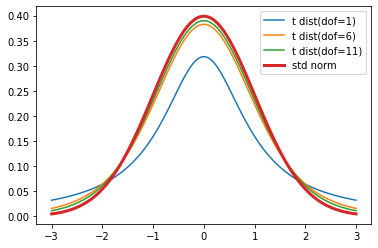

In [ ]:
x = np.linspace(-3, 3, 100)
#↓デフォルトだと標準正規分布になる
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
#凡例（らべるつけるとき）
plt.legend()

## 平均の区間推定（正規分布vsｔ分布)

In [ ]:
column = 'tip'
pooulation_mean = df[column].mean()
alpha = 0.95
n = 50

sample_df = df.sample(n)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column])
min_val_norm,max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
min_val_t,max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n),df=n-1)

In [ ]:
population_mean 

2.9982786885245902

In [ ]:
sample_mean

2.7912

In [ ]:
print(min_val_norm,max_val_norm)

2.474788647979696 3.107611352020304


In [ ]:
print(min_val_t,max_val_t)

2.4667795402636106 3.1156204597363892


## 比率の差の検定（Z-test)

In [ ]:
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

## 連関の検定（カイ二乗検定）

In [ ]:
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, correction=False)

(24.107142857142858, 9.112167294252327e-07, 1, array([[ 6., 14.],
        [24., 56.]]))

In [ ]:
# クリック率 ※ｐ値は両側のため×２倍になっている
obs = [[30, 33],[970, 967]]
stats.chi2_contingency(obs, correction=False)

(0.14750350320820121, 0.7009326077749313, 1, array([[ 31.5,  31.5],
        [968.5, 968.5]]))

In [ ]:
#確認のため、両側でｚ検定
proportions_ztest([30, 33], [1000, 1000], alternative='two-sided')

(-0.3840618481549573, 0.7009326077749309)

## ｚ検定と自由度１のカイ二乗検定

In [ ]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)



In [ ]:
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']

In [ ]:
sample_df1['time'].value_counts()

Dinner    40
Lunch     10
Name: time, dtype: int64

In [ ]:
#z検定
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(0.2126697050295569, 0.8315845980834438)

In [ ]:
sample1_freq = sample_df1['time'].value_counts().values
sample2_freq = sample_df2['time'].value_counts().values

In [ ]:
sample_df1['time'].value_counts().values

array([40, 10])

In [ ]:
# カイ二乗検定
stats.chi2_contingency([sample1_freq, sample2_freq],correction=False)

(0.045228403437358664, 0.8315845980834439, 1, array([[33.5, 16.5],
        [33.5, 16.5]]))

## 平均値差の検定

In [ ]:
male_tips = df[df['sex']=='Male']['tip_rate']
female_tips = df[df['sex']=='Female']['tip_rate']

In [ ]:
print(np.mean(male_tips), np.mean(female_tips))

0.15765054700429748 0.16649073632892475


In [ ]:
stats.ttest_ind(male_tips, female_tips)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [ ]:
stats.ttest_ind(male_tips, female_tips,equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

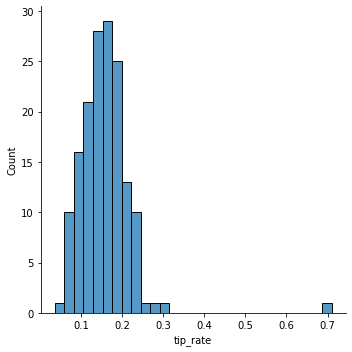

In [ ]:
sns.displot(male_tips)

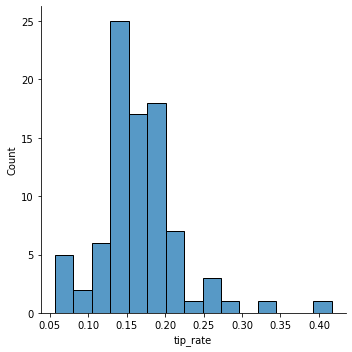

In [ ]:
sns.displot(female_tips)

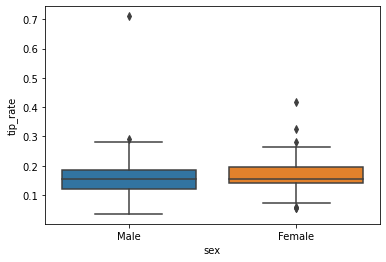

In [ ]:
sns.boxplot(data=df, x='sex', y='tip_rate')

## Ｑ－Ｑプロット

In [ ]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

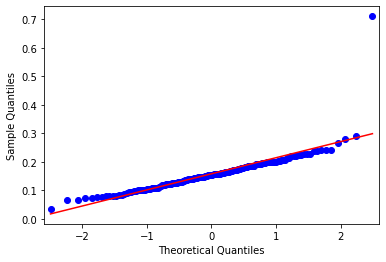

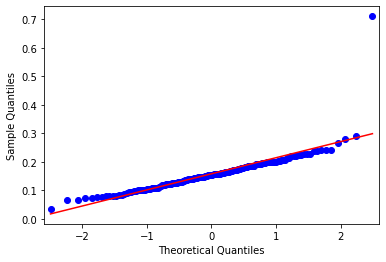

In [ ]:
qqplot(male_tipr, line='r')

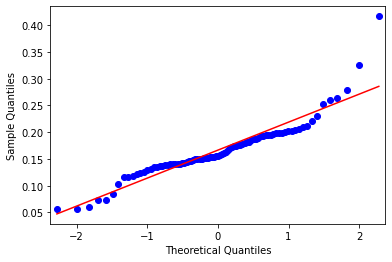

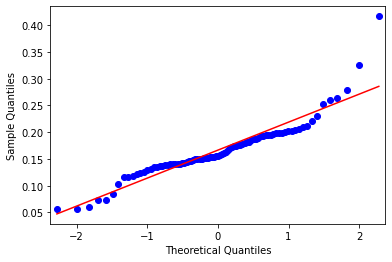

In [ ]:
qqplot(female_tipr, line='r')

In [ ]:
# 標準正規分布と違う理論分布でプロット
qqplot(male_tipr, line='r', dist=stats.norm(loc=np.mean(male_tipr), scale=np.sqrt(stats.tvar(male_tipr))))

AttributeError: ignored

## シャピロウィルク検定

In [ ]:
stats.shapiro(male_tipr)

(0.7447847127914429, 3.2243281107541917e-15)

In [ ]:
stats.shapiro(female_tipr)

(0.8982974290847778, 4.717996489489451e-06)

In [ ]:
#外れ値除外
stats.shapiro(np.sort(male_tipr)[:-1])

(0.9931070804595947, 0.6644759774208069)

In [ ]:
#外れ値除外
stats.shapiro(np.sort(female_tipr)[:-2])

(0.9696651697158813, 0.04252713546156883)

## F分布

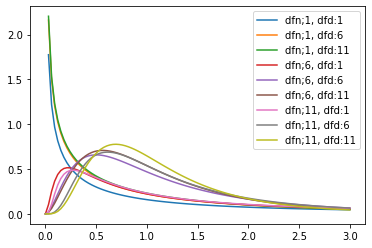

In [7]:
x = np.linspace(0,3,100)
for dfn in range(1,12,5):
  for dfd in range(1,12,5):
    y = stats.f.pdf(x,dfn=dfn, dfd=dfd)
    plt.plot(x,y,label=f'dfn;{dfn}, dfd:{dfd}')
plt.legend()


## F検定

In [9]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

In [10]:
print(np.var(male_tipr),np.var(female_tipr))

0.004169445577529407 0.0028433004255488206


In [12]:
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 - 1
dfd = n2 - 1
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1/var2
print(f)

1.4588472200534603


In [16]:
stats.f(dfn=dfn,dfd=dfd).sf(f)

0.027100863454374447

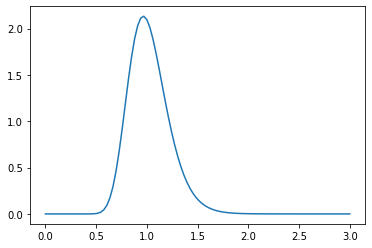

In [15]:
x = np.linspace(0,3,100)
y = stats.f(dfn=dfn,dfd=dfd).pdf(x)
plt.plot(x,y)

## 対応のある平均値差検定

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
%cd "/content/drive/My Drive/統計学/"

/content/drive/My Drive/統計学


In [22]:
bp_df =  pd.read_csv("blood_pressure.csv")

In [23]:
bp_df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [28]:
!pip list

Package                       Version
----------------------------- ------------------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.5.0
bs4                           0.

In [30]:
!pip install -U statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 6.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [44]:
stats.ttest_rel(bp_df['bp_before'], bp_df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [36]:
bp_df['bp_before'].mean()

156.45

In [35]:
bp_df['bp_after'].mean()

151.35833333333332

In [40]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']

In [41]:
bp_df['delta'].mean()

5.091666666666667

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


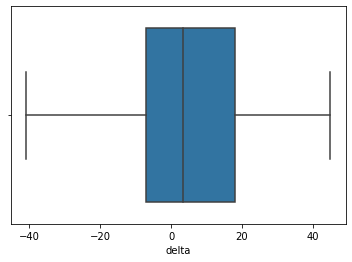

In [42]:
sns.boxplot(bp_df['delta'])